DFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6)]
BFS Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
DFS Nodes Visited: 13
BFS Nodes Visited: 33
DFS Path Length: 13
BFS Path Length: 13


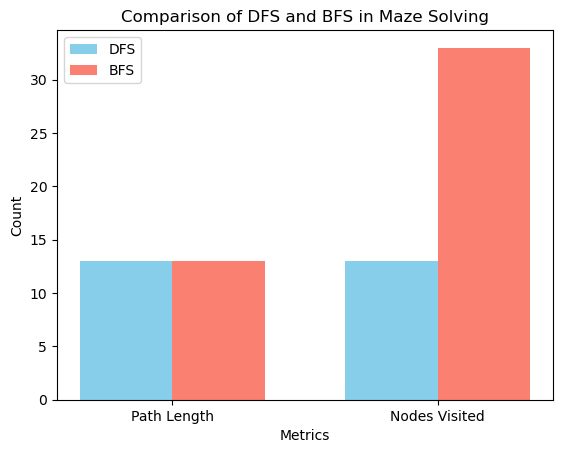

In [2]:
from collections import deque
import matplotlib.pyplot as plt

# Define the maze (0 = path, 1 = wall)
maze = [
    [0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
]
start = (0, 0)
end = (6, 6)


# Helper function to get valid neighbors
def get_neighbors(maze, node):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    neighbors = []
    x, y = node
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] == 0:
            neighbors.append((nx, ny))
    return neighbors


# Depth-First Search (DFS)
def dfs(maze, start, end):
    stack = [start]
    visited = set([start])
    parent = {start: None}
    node_count = 0

    while stack:
        current = stack.pop()
        node_count += 1

        # Check if we reached the end
        if current == end:
            path = reconstruct_path(parent, start, end)
            return path, node_count

        # Explore neighbors
        for neighbor in get_neighbors(maze, current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                stack.append(neighbor)

    return None, node_count  # No path found


# Breadth-First Search (BFS)
def bfs(maze, start, end):
    queue = deque([start])
    visited = set([start])
    parent = {start: None}
    node_count = 0

    while queue:
        current = queue.popleft()
        node_count += 1

        # Check if we reached the end
        if current == end:
            path = reconstruct_path(parent, start, end)
            return path, node_count

        # Explore neighbors
        for neighbor in get_neighbors(maze, current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)

    return None, node_count  # No path found


# Helper function to reconstruct the path from start to end
def reconstruct_path(parent, start, end):
    path = []
    current = end
    while current:
        path.append(current)
        current = parent[current]
    path.reverse()
    return path


# Run DFS and BFS and store path lengths and nodes visited
dfs_path, dfs_nodes = dfs(maze, start, end)
bfs_path, bfs_nodes = bfs(maze, start, end)

# Path lengths for comparison
dfs_path_length = len(dfs_path) if dfs_path else 0
bfs_path_length = len(bfs_path) if bfs_path else 0

# Display paths and comparisons
print("DFS Path:", dfs_path)
print("BFS Path:", bfs_path)
print("DFS Nodes Visited:", dfs_nodes)
print("BFS Nodes Visited:", bfs_nodes)
print("DFS Path Length:", dfs_path_length)
print("BFS Path Length:", bfs_path_length)

# Plotting the comparison graph
labels = ['Path Length', 'Nodes Visited']
dfs_values = [dfs_path_length, dfs_nodes]
bfs_values = [bfs_path_length, bfs_nodes]

x = range(len(labels))  # X-axis positions for the bars
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
ax.bar(x, dfs_values, width, label='DFS', color='skyblue')
ax.bar([i + width for i in x], bfs_values, width, label='BFS', color='salmon')

# Labeling the graph
ax.set_xlabel('Metrics')
ax.set_ylabel('Count')
ax.set_title('Comparison of DFS and BFS in Maze Solving')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()
